In [21]:
from pymatgen.ext.matproj import MPRester
from phonopy import Phonopy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pymatgen.phonon import plotter
from pymatgen.phonon import bandstructure
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
import plotly.graph_objects as go

# Initialiser l'API Materials Project
with MPRester("fuMQt6Cv541dxycfavlOQ02CsLxUQcOm") as m:
    structure = m.get_structure_by_material_id("mp-1011695")
    ph_dos = m.get_phonon_dos_by_material_id("mp-1011695")
    prim_struc = m.get_structure_by_material_id("mp-1011695")

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
fig_ph_dos = get_plot_dos(ph_dos)
fig_ph_dos.show()

In [23]:
temperatures = np.arange(0,1000,5)
R = 8.314
nat = len(prim_struc)
ph_cv = np.array([ph_dos.cv(temperatures[i]) for i in range(len(temperatures))])/(3*nat*R)

In [24]:
fig = go.Figure()
scatter = go.Scatter(x=temperatures, y=ph_cv)
fig.add_trace(scatter)
fig.add_hline(y=1, line_width=2, line_color="red")
fig.update_layout(
    xaxis =  {'mirror': True, 'showgrid': False, 'ticks': 'inside', 'ticklen':10},
    yaxis =  {'mirror': True, 'showgrid': False, 'ticks': 'inside', 'ticklen':10},
    xaxis_title = "Temperature",
    yaxis_title = "C<sub>v</sub> /\,3N_{\!at}R$",        
)
fig.show()

In [37]:
# Données expérimentales de la chaleur spécifique ph_cv
# Calcul de la température de Debye
hbar = 1.0545718e-34  # constante de Planck réduite en J*s
kB = 1.380649e-23  # constante de Boltzmann en J/K
omega_D = 10000000000000  # Estimation de la fréquence de Debye
theta_D = hbar * omega_D / kB

# Calcul de la température d'Einstein
omega_E = 10000000000000  # Estimation de la fréquence d'Einstein
theta_E = hbar * omega_E / kB

print("Température de Debye :", theta_D)
print("Température d'Einstein :", theta_E)

Température de Debye : 76.38232454447147
Température d'Einstein : 76.38232454447147


TypeError: float() argument must be a string or a number, not 'ellipsis'

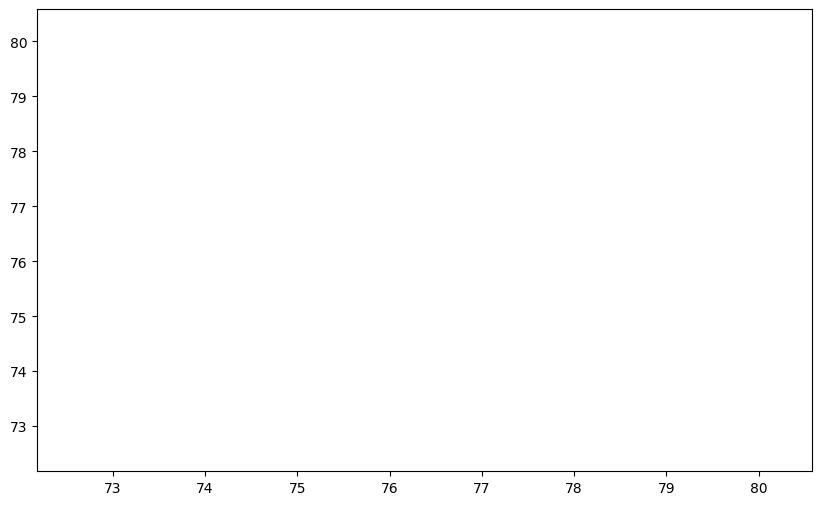

In [44]:
# Données expérimentales
temperatures_experimental = theta_D  
heat_capacity_experimental = theta_E  

# Modèle de Debye
heat_capacity_debye = ...  #chaleurs spécifiques calculées à partir du modèle de Debye

# Modèle d'Einstein
heat_capacity_einstein = ...  #chaleurs spécifiques calculées à partir du modèle d'Einstein

# Courbes
plt.figure(figsize=(10, 6))
plt.plot(temperatures_experimental, heat_capacity_experimental, label='Expérimental')
plt.plot(temperatures_experimental, heat_capacity_debye, label='Debye')
plt.plot(temperatures_experimental, heat_capacity_einstein, label='Einstein')

# Titre
plt.xlabel('Température (K)')
plt.ylabel('Chaleur spécifique')
plt.title('Courbes de chaleur spécifique')
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()


In [43]:
# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(frequencies_experimental, dos_experimental, label='Expérimental')
plt.plot(frequencies_debye, dos_debye, label='Debye')
plt.plot(frequencies_einstein, dos_einstein, label='Einstein')

# Définir les étiquettes et le titre
plt.xlabel('Fréquence (cm$^{-1}$)')
plt.ylabel('Densité d\'états de phonons')
plt.title('Densité d\'états de phonons')
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()

NameError: name 'frequencies_experimental' is not defined

<Figure size 1000x600 with 0 Axes>